In [5]:
import numpy as np
import matplotlib.pyplot as plt

def state_plotter(times, states, fig_num):
    num_states = np.shape(states)[0]
    num_cols = int(np.ceil(np.sqrt(num_states)))
    num_rows = int(np.ceil(num_states / num_cols))
    plt.figure(fig_num)
    plt.clf()
    fig, ax = plt.subplots(num_rows, num_cols, num=fig_num, clear=True,
                         squeeze=False)
    for n in range(num_states):
        row = n // num_cols
        col = n % num_cols
        ax[row][col].plot(times, states[n], 'k.:')
        ax[row][col].set(xlabel='Time',
                         ylabel='$y_{:0.0f}(t)$'.format(n),
                         title='$y_{:0.0f}(t)$ vs. Time'.format(n))
        
    for n in range(num_states, num_rows * num_cols):
        fig.delaxes(ax[n // num_cols][n % num_cols])

    fig.tight_layout()

# Constant Rate of Change
If the dependent variable has a constant rate of change:
                                    **$$\frac{dy}{dt}=C$$**
where C is some constant, you can provide the differential equation in the f function and then calculate answers using this model with the code below. The code assumes there are 100 evenly spaced times between 0 and 10, the initial value of y is 6, and the rate of change is 1.2: 

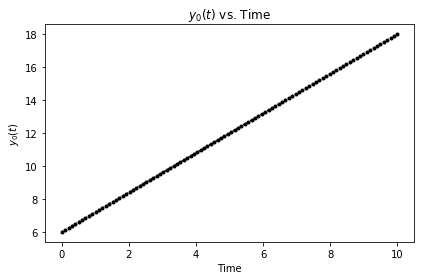

In [7]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp



# %% Define independent function and derivative function

def f(t, y, c):

    dydt = [c[0]]

    return dydt


# %% Define time spans, initial values, and constants

tspan = np.linspace(0, 10, 100)

yinit = [6]

c = [1.2]


# %% Solve differential equation

sol = solve_ivp(lambda t, y: f(t, y, c), 

                [tspan[0], tspan[-1]], yinit, t_eval=tspan)


# %% Plot states

state_plotter(sol.t, sol.y, 1)

# Time-dependent Rate of Change
Result using time-varying rate of change:

If the dependent variable's rate of change is some function of time, this can be easily coded. For example, if the differential equation is some quadratic function given as:
**$$\frac{dy}{dt}=αt^2+βt+γ$$**

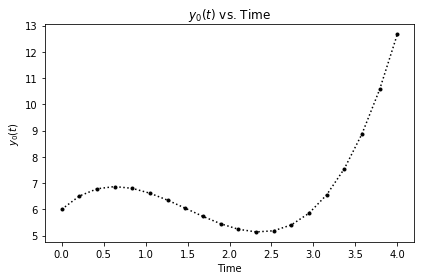

In [8]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

#from ode_helpers import state_plotter


# %% Define derivative function

def f(t, y, c):

    dydt = np.polyval(c, t)

    return dydt

    

# %% Define time spans, initial values, and constants

tspan = np.linspace(0, 4, 20)

yinit = [6]

c = [2, -6, 3]


# %% Solve differential equation

sol = solve_ivp(lambda t, y: f(t, y, c), 

                [tspan[0], tspan[-1]], yinit, t_eval=tspan)


# %% Plot states

state_plotter(sol.t, sol.y, 1)


# Population Growth
For population growth, the rate of change of population is dependent upon the number of people as well as some constant of proportionality:
**$$\frac{dy}{dt}=C⋅y $$**
where C is again some constant. The following code will calculate the population for a span of 3 seconds with 25 points for the population model above with an initial population of 10 and a constant of proportionality of 1.02:

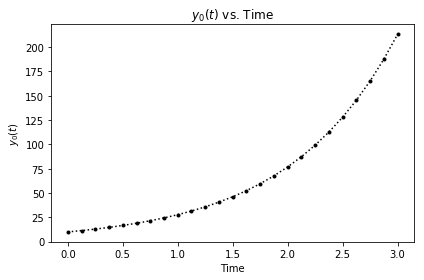

In [9]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

# from ode_helpers import state_plotter


# %% Define derivative function

def f(t, y, c):

    dydt = [c[0] * y[0]]

    return dydt

    

# %% Define time spans, initial values, and constants

tspan = np.linspace(0, 3, 25)

yinit = [10]

c = [1.02]


# %% Solve differential equation

sol = solve_ivp(lambda t, y: f(t, y, c), 

                [tspan[0], tspan[-1]], yinit, t_eval=tspan)


# %% Plot states

state_plotter(sol.t, sol.y, 1)


# Multiple Variable Models
Result for system with two variables
It is possible to solve multiple-variable systems by making sure the differential function returns values for each of the variables. For instance, in the following system the first variable's rate of change depends only on time while the second is dependent upon both time and the first variable:
                                    $$\frac{dy_0}{dt} = α cos(βt)$$
                                    $$\frac{dy_1}{dt}= γ y_{0}+δt$$
The differential function f for this system will have a 2 element list as the output. Also, if you have systems with multiple dependent variables, just be sure to put the initial conditions in a list. For example, with the system defined as:
                                    $$\frac{dy_0}{dt}=4cos(3t)$$
                                    $$\frac{dy_1}{dt}=−2y_0+0.5t$$                                  
you could use the following script to solve for both y_0 and y_1; the code assumes y_0 starts as 0 and y_1 starts at -3:                                   

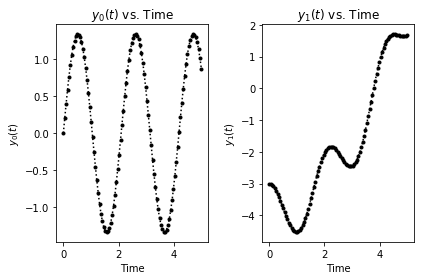

In [12]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

#from ode_helpers import state_plotter


# %% Define derivative function

def f(t, y, c):

    dydt = [c[0]*np.cos(c[1]*t), c[2]*y[0]+c[3]*t]

    return dydt


# %% Define time spans, initial values, and constants

tspan = np.linspace(0, 5, 100)

yinit = [0, -3]

c = [4, 3, -2, 0.5]


# %% Solve differential equation

sol = solve_ivp(lambda t, y: f(t, y, c), 

                [tspan[0], tspan[-1]], yinit, t_eval=tspan)


# %% Plot states

state_plotter(sol.t, sol.y, 1)

# Higher Order Differential Equations:
The system must be written in terms of first-order differential equations only. To solve a system with higher-order derivatives, you will first write a cascading system of simple first-order equations then use them in your differential function. For example, assume you have a system characterized by constant jerk:
$$j = \frac{d^3y}{dt^3}=C $$
The first thing to do is write three first-order differential equations to represent the third-order equation:
$$y_0 = y$$ , 
$$\frac{dy_0}{dt}= \frac{dy}{dt} = y_{1}  ------->  \frac{dy_0}{dt} = y_{1}$$
$$\frac{dy_1}{dt}= \frac{d^2y_0}{dt^2} = \frac{d^2y}{dt^2} = y_{2} ------->  \frac{dy_1}{dt} = y_{2}$$
$$\frac{dy_2}{dt}= \frac{d^2y_1}{dt^2} = \frac{d^3y_0}{dt^3} = \frac{d^3y}{dt^3} = j = C ------->  \frac{dy_2}{dt} = C$$
Notice how the derivatives cascade so that the constant jerk equation can now be written as a set of three first-order equations. Note that in this system, $y_0$ represents the position, $y_1$ represents the velocity, and $y_2$ represents the acceleration. This type of cascading system will show up often when modeling equations of motion.

The following script, RunJerkDiff.m, calculates the position, velocity, and speed over a period of 8 seconds assuming an initial position of 6, and initial velocity of 2, an initial acceleration of -4, and a constant jerk of 1.3:



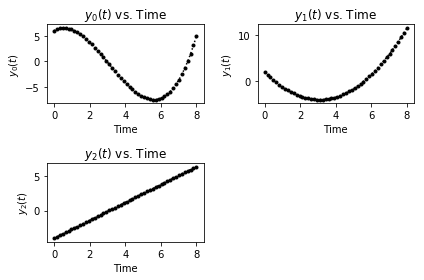

In [11]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

# from ode_helpers import state_plotter


# %% Define derivative function

def f(t, y, c):

    dydt = [y[1], y[2], c[0]]

    return dydt


# %% Define time spans, initial values, and constants

tspan = np.linspace(0, 8, 50)

yinit = [6, 2, -4]

c = [1.3]


# %% Solve differential equation

sol = solve_ivp(lambda t, y: f(t, y, c), 

                [tspan[0], tspan[-1]], yinit, t_eval=tspan)


# %% Plot states

state_plotter(sol.t, sol.y, 1)